In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
exer=pd.read_csv('exercise.csv')
cal=pd.read_csv('calories.csv')

In [3]:
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df=pd.merge(exer,cal,on='User_ID',how='left')

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


#  EDA Questions for Fitness Dataset

## 1. General Information
- What is the total number of unique users in the dataset?
- What is the gender distribution of users?
- Are there any missing values in any of the columns?

## 2. Statistical Summary
- What is the mean, median, and standard deviation of Age, Height, Weight, Duration, Heart Rate, Body Temp, and Calories?
- Are there any outliers in the numerical columns?

## 3. Relationship-Based Analysis
- How does workout Duration affect Calories burned?
- Is there a correlation between Heart Rate and Calories burned?
- Does Body Temperature change significantly with Age or workout Duration?

## 4. Grouped Comparisons
- What is the average Calories burned by Gender?
- How does the average Heart Rate vary across different Age groups?
- Is there a trend in Calories burned with increasing Age?


In [7]:
df['User_ID'].nunique()

15000

In [8]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [9]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


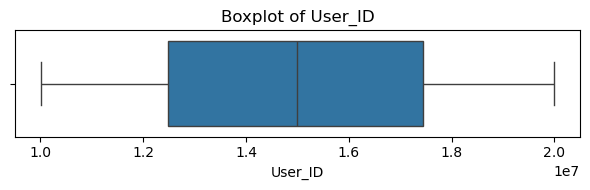

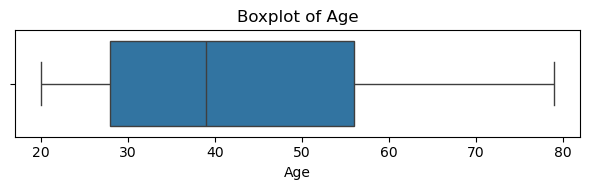

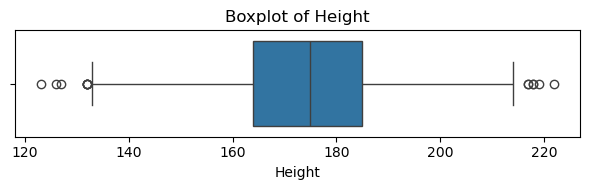

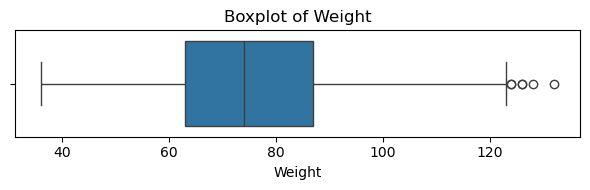

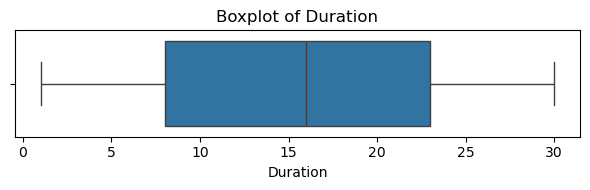

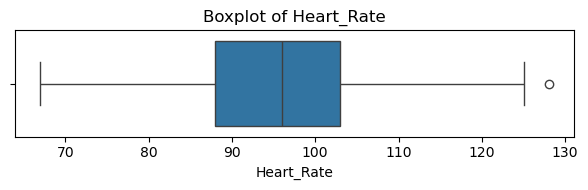

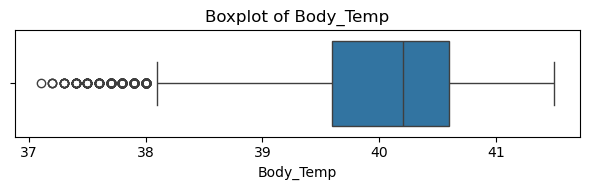

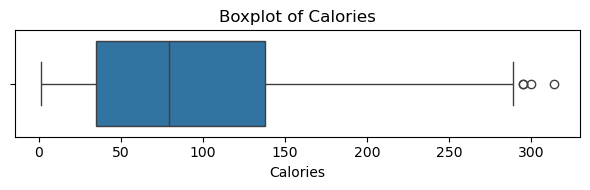

In [11]:
numeric=df.select_dtypes(include=[int,float])
for clm in numeric.columns:
    plt.figure(figsize=(6, 2))  
    sns.boxplot(x=clm, data=df)
    plt.xlabel(clm)
    plt.title(f'Boxplot of {clm}')
    plt.tight_layout()
    plt.show()

### Outlier Analysis

As we can clearly see, there are outliers in the `Calories`, `Body_Temp`, `Heart_Rate`, `Weight`, and `Height` columns.


In [12]:
outlier_columns = []


for col in numeric.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any outliers exist
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outlier_columns.append(col)
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



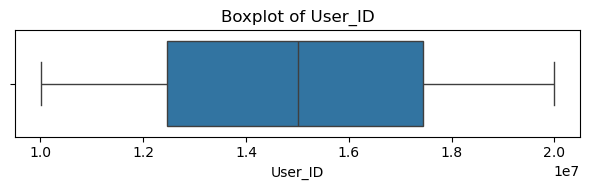

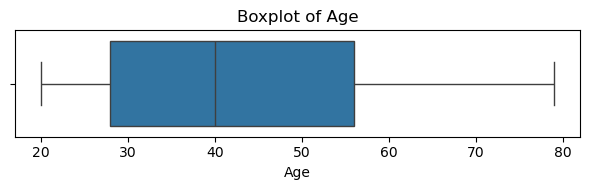

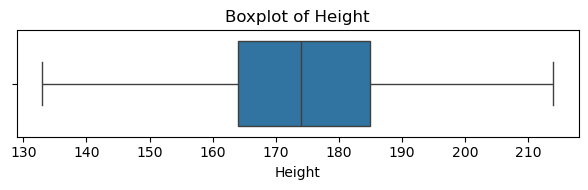

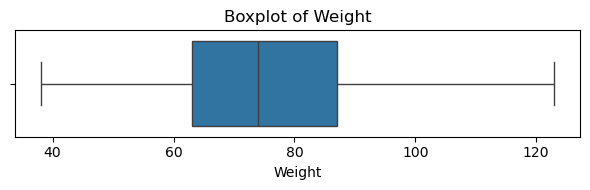

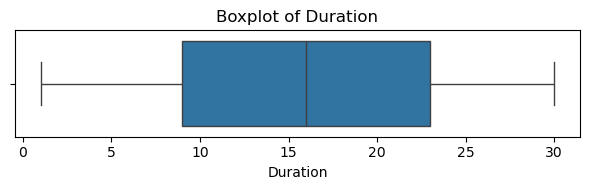

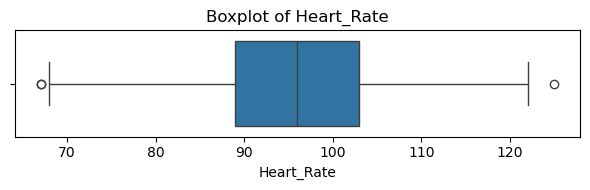

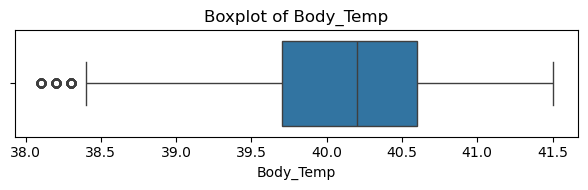

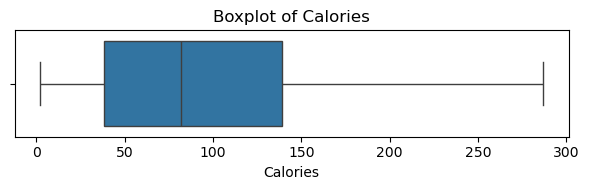

In [13]:
numeric=df.select_dtypes(include=[int,float])
for clm in numeric.columns:
    plt.figure(figsize=(6, 2))  
    sns.boxplot(x=clm, data=df)
    plt.xlabel(clm)
    plt.title(f'Boxplot of {clm}')
    plt.tight_layout()
    plt.show()

##  Repeating IQR for Outlier Removal

Sometimes, applying the IQR (Interquartile Range) method **once** does not remove **all outliers** from the dataset.  
This is because some extreme values may still remain **after the first filtering**.

 Therefore, we may need to **apply the IQR method multiple times** to completely remove outliers from the data.

This ensures a cleaner dataset for training and improves model performance.


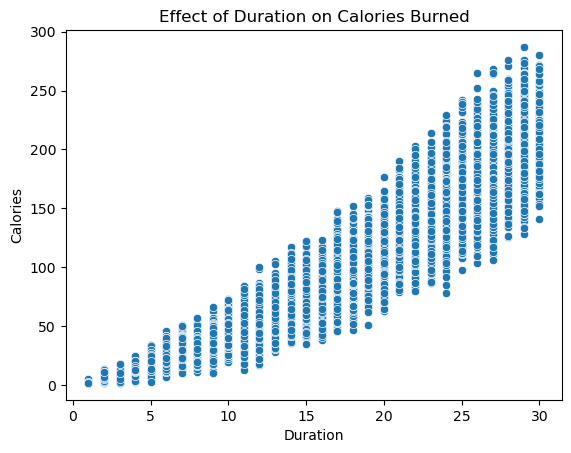

In [14]:
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title('Effect of Duration on Calories Burned')
plt.show()

### **It is clearly observed that an increase in Duration leads to an increase in Calories burned.**


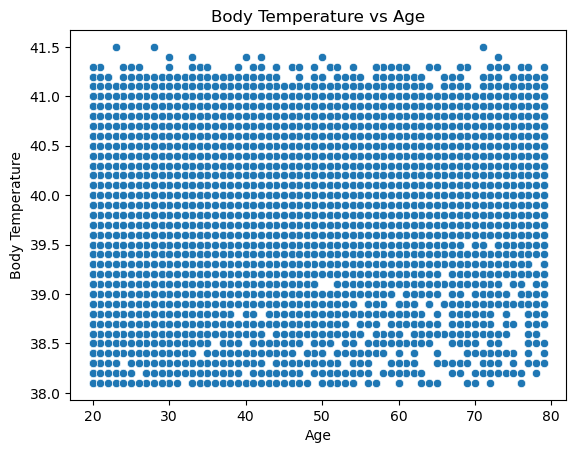

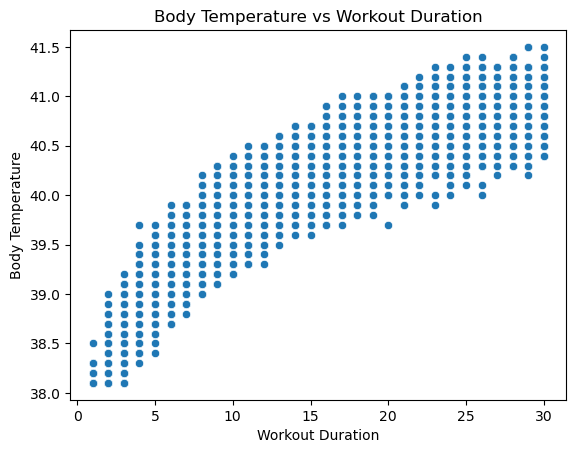

In [ ]:
sns.scatterplot(x='Age', y='Body_Temp', data=df)
plt.title('Body Temperature vs Age')
plt.xlabel('Age')
plt.ylabel('Body Temperature')
plt.show()

sns.scatterplot(x='Duration', y='Body_Temp', data=df)
plt.title('Body Temperature vs Workout Duration')
plt.xlabel('Workout Duration')
plt.ylabel('Body Temperature')
plt.show()


###  Body Temperature Analysis

- There is **no clear relationship** between **Age** and **Body Temperature** based on the scatter plot.
- However, **Body Temperature tends to increase** with **Workout Duration**, indicating a **positive correlation**.


In [16]:
df.groupby("Gender")["Calories"].mean()

Gender
female    90.249117
male      92.991590
Name: Calories, dtype: float64

In [17]:
df.head().T

,0,1,2,3,4
User_ID,14733363,14861698,11179863,16180408,17771927
Gender,male,female,male,female,female
Age,68,20,69,34,27
Height,190.0,166.0,179.0,179.0,154.0
Weight,94.0,60.0,79.0,71.0,58.0
Duration,29.0,14.0,5.0,13.0,10.0
Heart_Rate,105.0,94.0,88.0,100.0,81.0
Body_Temp,40.8,40.3,38.7,40.5,39.8
Calories,231.0,66.0,26.0,71.0,35.0


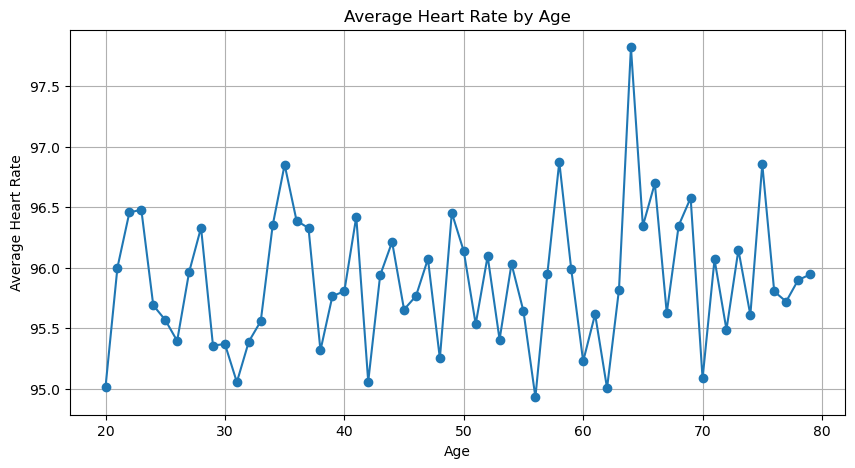

In [18]:

age = df.groupby("Age")["Heart_Rate"].mean()

plt.figure(figsize=(10,5))
plt.plot(age.index, age.values, marker='o')
plt.title('Average Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()

###  Heart Rate vs Age

As we clearly see, the average heart rate shows **fluctuations across different ages** without a consistent increasing or decreasing trend.  
This indicates that **there is no strong relationship between Age and Heart Rate** in the dataset.


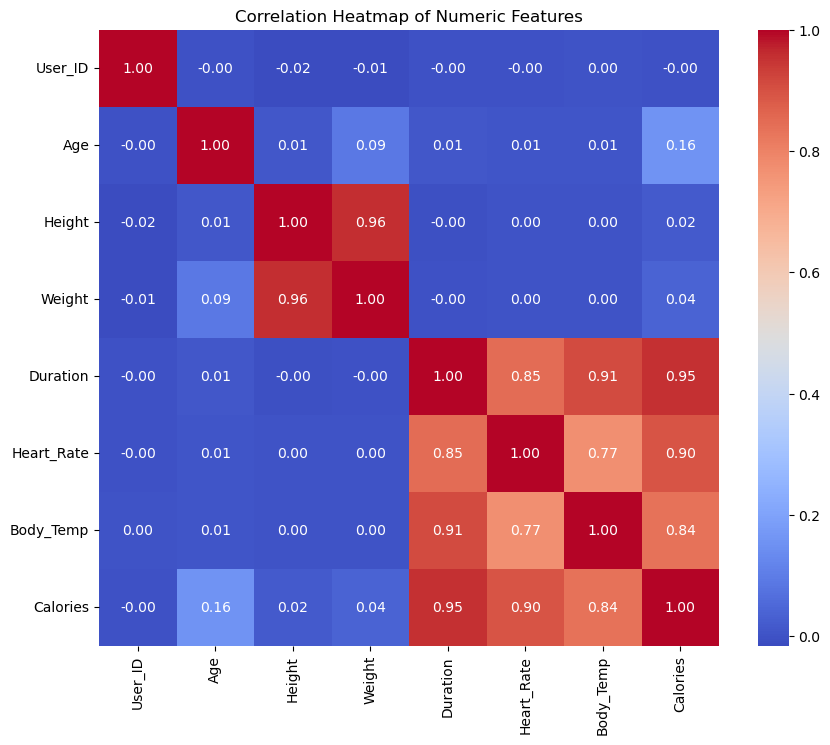

In [19]:
numeric = df.select_dtypes(include=[int, float])

corr = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

###  Feature Selection Insights from Heatmap

- We dropped **User_ID** as it is just an identifier and not useful for prediction.
- **Height** and **Weight** have a very high correlation (**0.96**), which indicates **multicollinearity**.
- To address this, we dropped **Height** because it has a low correlation (**0.02**) with the target variable **Calories**.


In [20]:
df=df.drop(columns=['User_ID','Height'],axis=1)

In [21]:
df.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,94.0,29.0,105.0,40.8,231.0
1,female,20,60.0,14.0,94.0,40.3,66.0
2,male,69,79.0,5.0,88.0,38.7,26.0
3,female,34,71.0,13.0,100.0,40.5,71.0
4,female,27,58.0,10.0,81.0,39.8,35.0


## **Label Encoder**

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['Gender']=le.fit_transform(df['Gender'])

In [116]:
import joblib
joblib.dump(le, 'gender_encoder.pkl')

['gender_encoder.pkl']

In [24]:
df.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,94.0,29.0,105.0,40.8,231.0
1,0,20,60.0,14.0,94.0,40.3,66.0
2,1,69,79.0,5.0,88.0,38.7,26.0
3,0,34,71.0,13.0,100.0,40.5,71.0
4,0,27,58.0,10.0,81.0,39.8,35.0


## **Train Test Split**

In [25]:
x=df.drop(['Calories'],axis=1)
y=df['Calories']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Standard Scalar**

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [29]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [118]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

## **Model Training**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline

In [31]:
models={
    "Linear Regression":LinearRegression(),
    'SVR': make_pipeline(StandardScaler(),SVR()),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Random Forest':RandomForestRegressor(random_state=42)
}

In [32]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"🔍 {name}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2 * 100:.2f}%")
    print("-" * 40)

🔍 Linear Regression
MAE : 8.44
MSE : 126.47
RMSE: 11.25
R² Score: 96.63%
----------------------------------------
🔍 SVR
MAE : 1.99
MSE : 22.77
RMSE: 4.77
R² Score: 99.39%
----------------------------------------
🔍 Decision Tree
MAE : 3.29
MSE : 26.64
RMSE: 5.16
R² Score: 99.29%
----------------------------------------
🔍 Random Forest
MAE : 1.72
MSE : 7.38
RMSE: 2.72
R² Score: 99.80%
----------------------------------------


## **Deep Learning**

In [68]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [69]:
model_1=models.Sequential([
    layers.Dense(256,activation='relu',input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='linear'),
])

d:\Anaconda\envs\dl_py\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True)
early=callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [71]:
model_1.compile(
    loss='mse',    
    optimizer='adam',
    metrics=['mae', 'mse']
)

In [72]:
history=model_1.fit(
    x_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,    
    callbacks=[checkpoint_cb]
)


Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8221.6260 - mae: 65.8607 - mse: 8221.6260 - val_loss: 77.3083 - val_mae: 6.9173 - val_mse: 77.3083
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.7544 - mae: 5.8730 - mse: 57.7544 - val_loss: 12.6348 - val_mae: 2.7059 - val_mse: 12.6348
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7880 - mae: 2.1936 - mse: 8.7880 - val_loss: 5.1729 - val_mae: 1.8379 - val_mse: 5.1729
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4829 - mae: 1.3582 - mse: 3.4829 - val_loss: 1.8470 - val_mae: 0.9265 - val_mse: 1.8470
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7014 - mae: 0.8959 - mse: 1.7014 - val_loss: 1.1822 - val_mae: 0.7684 - val_mse: 1.1822
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2797 - mae: 0.7983 - mse: 1.2797 - val_loss: 0.8864 - val_mae: 0.6800 - val_mse: 0.8864
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8559 - mae: 0.6712

In [83]:
from tensorflow.keras.models import load_model
best = load_model("best_model.keras")

y_pred = best.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"{r2 * 100:.2f}%")


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100.00%


In [77]:
import numpy as np

best_val_loss = np.min(history.history['val_loss'])
best_val_mae = np.min(history.history['val_mae'])
print(f"Best Val Loss: {best_val_loss:.4f}, Best Val MAE: {best_val_mae:.4f}")


Best Val Loss: 0.1453, Best Val MAE: 0.3087


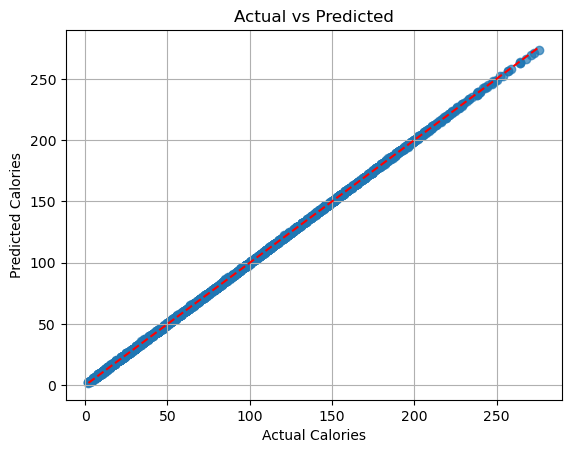

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


# **Real Time Predicitons**

In [84]:
df.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,94.0,29.0,105.0,40.8,231.0
1,0,20,60.0,14.0,94.0,40.3,66.0
2,1,69,79.0,5.0,88.0,38.7,26.0
3,0,34,71.0,13.0,100.0,40.5,71.0
4,0,27,58.0,10.0,81.0,39.8,35.0


In [131]:
Gender=input('Enter you Gender (Male or Female)')
while Gender.lower() not in ['male','female']:
    print('Please Enter your gender (Male or Female)')
    Gender=input('Enter you Gender (Male or Female)')
Age = input("Enter your age: ")
while not Age.isdigit():
    print("Enter your age as an integer.")
    Age = input("Enter your age: ")

Age = int(Age)


while True:
    Weight = input("Enter your weight (KG): ")
    try:
        Weight = float(Weight)
        break
    except ValueError:
        print("Please enter a valid weight in KG (e.g., 60 or 60.5).")

while True:
    Duration = input("Enter your workout duration (mins): ")
    try:
        Duration = float(Duration)
        break
    except ValueError:
        print("Please enter a valid workout duration in mins (e.g., 60).")


while True:
    Heart_Rate = input("Enter your Heart_Rate: ")
    try:
        Heart_Rate = float(Heart_Rate)
        break
    except ValueError:
        print("Please enter a valid Heart_Rate.")


while True:
    Body_Temp = input("Enter your Body_Temp(Celsius): ")
    try:
        Body_Temp= float(Body_Temp)
        break
    except ValueError:
        print("Please enter a valid Body_Temp(Celsius).")


le = joblib.load('gender_encoder.pkl')
gender_encoded = le.transform([Gender.lower()])[0]

scaler = joblib.load('scaler.pkl')

input_data = np.array([[gender_encoded, Age, Weight, Duration, Heart_Rate, Body_Temp]])
scaled_input = scaler.transform(input_data)


d:\Anaconda\envs\dl_py\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [132]:
prediction = best.predict(scaled_input)
print(f"Total Calories Burned are {prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Total Calories Burned are 277.99
